In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!mkdir "/content/Breast_Cancer/"

In [3]:
!unzip "/content/drive/My Drive/ICIAR/Datasets/Macenko_binary.zip" -d /content/Breast_Cancer/

Archive:  /content/drive/My Drive/ICIAR/Datasets/Macenko_binary.zip
   creating: /content/Breast_Cancer/Macenko_binary/test/
   creating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is005.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is006.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is007.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is011.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is015.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is016.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is022.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is027.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is030.png  
  inflating: /content/Breast_Cancer/Macenko_binary/test/Carcinoma/is032.png  
  inflating: /content/Breast

In [4]:
import os
from os.path import basename, join, exists

In [5]:
os.chdir(r"/content/Breast_Cancer/Macenko_binary/")

In [6]:
ls

test/  train/


In [7]:
folder=r"train/"
total=0
print('---Training set details----')
for sub_folder in os.listdir(folder):
  no_of_images=len(os.listdir("train/" + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of breast cancer images ",total)

---Training set details----
2310 Carcinoma images
2310 Non-carcinoma images
Total no. of breast cancer images  4620


In [8]:
folder=r"test/"
total=0
print('---Test set details----')
for sub_folder in os.listdir(folder):
  no_of_images=len(os.listdir("test/" + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of breast cancer images",total)

---Test set details----
50 Carcinoma images
50 Non-carcinoma images
Total no. of breast cancer images 100


In [9]:
!mkdir "/content/Breast_Cancer/extracted_features/"

In [10]:
extracted_features_dir="/content/Breast_Cancer/extracted_features/"

In [11]:
import numpy as np
np.random.seed(777)
import time
import keras as keras
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import merge,Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input as pi_vgg16
from keras.applications.inception_v3 import preprocess_input as pi_incep
from keras.applications.resnet50 import preprocess_input as pi_resnet
from keras.applications.vgg19 import preprocess_input as pi_vgg19
from keras.applications.xception import preprocess_input as pi_xcep 
from keras.models import load_model
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from  numpy import mean 
from numpy import std
import matplotlib.pyplot as plt
from keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from keras.layers import GlobalAveragePooling2D, Concatenate
from keras.layers import BatchNormalization,Dropout
from keras.layers import Lambda
from keras.regularizers import l2
import math
from keras import backend as K
from keras.metrics import categorical_accuracy
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from keras.models import load_model

In [12]:
img_height =512
img_width = 512
batch_size =32
input_shape = (img_width, img_height, 3)

In [13]:
print("-----------------Image Augmentation for VGG16--------------")

random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.2,
    zoom_range=0.2)
    #shear_range=0.2)

train_generator_vgg16 = train_datagen.flow_from_directory(
    "train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'training',
    class_mode='categorical')

val_generator_vgg16 = train_datagen.flow_from_directory(
    "train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'validation',
    class_mode='categorical')

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator_vgg16=test_datagen.flow_from_directory("test/",
                                                      target_size=(img_height, img_width),
                                                          batch_size=batch_size, 
                                                          seed=random_seed,
                                                          shuffle=False,
                                                          class_mode='categorical') # set as training data



-----------------Image Augmentation for VGG16--------------
Found 3696 images belonging to 2 classes.
Found 924 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [14]:

nb_train_samples = len(train_generator_vgg16.filenames)
nb_validation_samples = len(val_generator_vgg16.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator_vgg16.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))
print(nb_train_samples)
print(nb_validation_samples)
print(nb_test_samples)
print(predict_size_train)
print(predict_size_validation)
print(predict_size_test)

3696
924
100
116
29
4


In [ ]:
model_name="VGG16"
model = VGG16(include_top=False, weights="imagenet",pooling='avg',input_tensor=Input(shape=input_shape))
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
______________________________________________________________

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d


In [ ]:
image_input =model.input
x1 = GlobalAveragePooling2D()(model.get_layer("block2_conv1").output)  
x2 = GlobalAveragePooling2D()(model.get_layer("block4_conv1").output)  
x3 = GlobalAveragePooling2D()(model.get_layer("block5_conv1").output)  
out= Concatenate()([x1,x2,x3])
custom_vgg16_model = Model(image_input , out)
custom_vgg16_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 512, 512, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 256, 256, 64) 0           block1_conv2[0][0]               
_______________________________________________________________________________________

In [ ]:
for i, layer in enumerate(custom_vgg16_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 global_average_pooling2d_1
17 global_average_pooling2d_2
18 global_average_pooling2d_3
19 concatenate


In [ ]:
for layer in custom_vgg16_model.layers[:15]:
    layer.trainable = False
custom_vgg16_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 512, 512, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 256, 256, 64) 0           block1_conv2[0][0]               
_______________________________________________________________________________________

In [ ]:
#Saving features of the training images
bottleneck_features_train = custom_vgg16_model.predict_generator(train_generator_vgg16, predict_size_train)
np.save(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
# Saving features of the validation images
bottleneck_features_validation = custom_vgg16_model.predict_generator(val_generator_vgg16, predict_size_validation)
np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

In [ ]:
# Saving features of the test images
bottleneck_features_test = custom_vgg16_model.predict_generator(test_generator_vgg16, predict_size_test)
np.save(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [ ]:
train_data = np.load(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy')
validation_data = np.load(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy')
test_data = np.load(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy')

In [16]:
train_data=np.load('/content/drive/My Drive/ICIAR/bottleneck_features/Macenko_binary/VGG16/bottleneck_features_train_VGG16.npy')
validation_data=np.load('/content/drive/My Drive/ICIAR/bottleneck_features/Macenko_binary/VGG16/bottleneck_features_validation_VGG16.npy')
test_data=np.load('/content/drive/My Drive/ICIAR/bottleneck_features/Macenko_binary/VGG16/bottleneck_features_test_VGG16.npy')

In [17]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(3696, 1152)
(924, 1152)
(100, 1152)


In [18]:
train_labels=train_generator_vgg16.classes
train_labels=train_labels = keras.utils.to_categorical(train_labels, num_classes=2)
validation_labels=val_generator_vgg16.classes
validation_labels = keras.utils.to_categorical(validation_labels, num_classes=2)
test_labels=test_generator_vgg16.classes
test_labels=keras.utils.to_categorical(test_labels,num_classes=2)

In [19]:
print(train_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

(3696, 2)
(924, 2)
(100, 2)


In [23]:

model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
adam_opt2=Adam(lr = 0.001, beta_1=0.6, beta_2=0.8, amsgrad=True)

model.compile(optimizer=adam_opt2, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=1000,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)


Epoch 1/1000
116/116 - 0s - loss: 0.9303 - accuracy: 0.6962 - val_loss: 0.4681 - val_accuracy: 0.7738
Epoch 2/1000
116/116 - 0s - loss: 0.4782 - accuracy: 0.7695 - val_loss: 0.4217 - val_accuracy: 0.8290
Epoch 3/1000
116/116 - 0s - loss: 0.4433 - accuracy: 0.8003 - val_loss: 0.3924 - val_accuracy: 0.8301
Epoch 4/1000
116/116 - 0s - loss: 0.4057 - accuracy: 0.8225 - val_loss: 0.3510 - val_accuracy: 0.8777
Epoch 5/1000
116/116 - 0s - loss: 0.3825 - accuracy: 0.8352 - val_loss: 0.3294 - val_accuracy: 0.8810
Epoch 6/1000
116/116 - 0s - loss: 0.3490 - accuracy: 0.8531 - val_loss: 0.3171 - val_accuracy: 0.8755
Epoch 7/1000
116/116 - 0s - loss: 0.3464 - accuracy: 0.8517 - val_loss: 0.3318 - val_accuracy: 0.8485
Epoch 8/1000
116/116 - 0s - loss: 0.3192 - accuracy: 0.8690 - val_loss: 0.2847 - val_accuracy: 0.8994
Epoch 9/1000
116/116 - 0s - loss: 0.3108 - accuracy: 0.8796 - val_loss: 0.2645 - val_accuracy: 0.9091
Epoch 10/1000
116/116 - 0s - loss: 0.2923 - accuracy: 0.8847 - val_loss: 0.2566 - 

In [ ]:
preds = model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 1.0


In [ ]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
#cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.89


In [ ]:
model.save('/content/drive/My Drive/ICIAR/best_saved_models/Macenko_binary/VGG16/vgg16_upto15frozen.h5')
model.save_weights('/content/drive/My Drive/ICIAR/best_saved_models/Macenko_binary/VGG16/vgg16_upto15frozen_weights.h5')

In [21]:
loaded_model=load_model('/content/drive/My Drive/ICIAR/best_saved_models/Macenko_binary/VGG16/vgg16_upto15frozen.h5',compile=False)
loaded_model.load_weights('/content/drive/My Drive/ICIAR/best_saved_models/Macenko_binary/VGG16/vgg16_upto15frozen_weights.h5')

Accuracy vs Epoch Graph

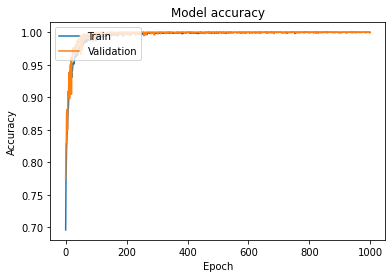

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

Loss vs Epoch Graph

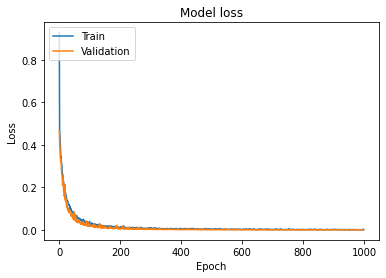

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [ ]:
train_labels=train_generator_vgg16.classes
train_labels=train_labels = keras.utils.to_categorical(train_labels, num_classes=2)
validation_labels=val_generator_vgg16.classes
validation_labels = keras.utils.to_categorical(validation_labels, num_classes=2)
test_labels=test_generator_vgg16.classes
test_labels=keras.utils.to_categorical(test_labels,num_classes=2)

In [ ]:
validation_data=np.load('/content/drive/My Drive/ICIAR/bottleneck_features/Macenko_binary/VGG16/bottleneck_features_validation_VGG16.npy')
test_data=np.load('/content/drive/My Drive/ICIAR/bottleneck_features/Macenko_binary/VGG16/bottleneck_features_test_VGG16.npy')

In [ ]:
preds = loaded_model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import pandas as pd

In [ ]:
preds = loaded_model.predict(test_data)

y_pred = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=y_pred, y_true=y_true)

print('Test Accuracy={}'.format(accuracy_score(y_true=y_true, y_pred=y_pred)))

Test Accuracy=0.89


CONFUSION MATRIX


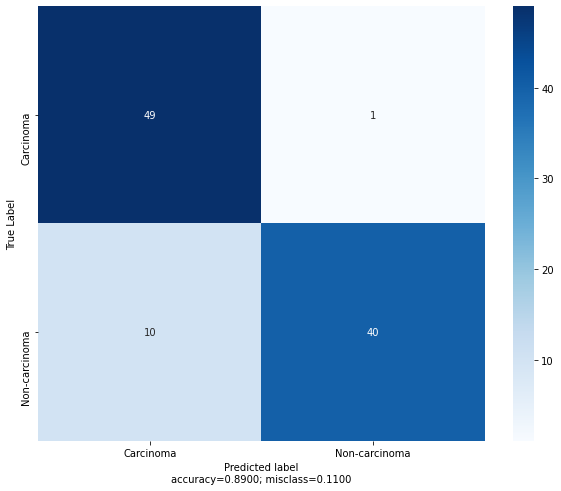

The details for confusion matrix is =
               precision    recall  f1-score   support

    Carcinoma       0.83      0.98      0.90        50
Non-carcinoma       0.98      0.80      0.88        50

     accuracy                           0.89       100
    macro avg       0.90      0.89      0.89       100
 weighted avg       0.90      0.89      0.89       100



In [ ]:
print('CONFUSION MATRIX')
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Carcinoma','Non-carcinoma'],  
                           index =['Carcinoma','Non-carcinoma']) 

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.figure(figsize = (10,8)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
plt.ylabel('True Label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show() 

target_names=['Carcinoma','Non-carcinoma']
print('The details for confusion matrix is =') 
print (classification_report(y_true, y_pred,target_names=target_names))

In [ ]:
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

Sensitivity :  83.05084745762711
Specificity :  97.5609756097561


Prediction Matrix

In [ ]:
import pandas as pd

In [ ]:
preds = loaded_model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
val_df=pd.DataFrame({'True Label':y_true,'vgg16':predictions})
val_df

,True Label,vgg16
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
919,1,1
920,1,1
921,1,1
922,1,1


In [ ]:
val_df.to_csv('/content/drive/My Drive/ICIAR/Binary_prediction_matrix.csv')

Confidence Matrix

In [ ]:
import pandas as pd

In [ ]:
preds = loaded_model.predict(test_data)
y_true = [i.argmax() for i in test_labels]
print(preds)

[[9.99997139e-01 2.80387917e-06]
 [1.00000000e+00 3.98650402e-09]
 [9.96353626e-01 3.64641147e-03]
 [1.00000000e+00 7.20850990e-10]
 [1.00000000e+00 4.69401644e-13]
 [1.00000000e+00 5.55483298e-11]
 [1.00000000e+00 6.51982801e-10]
 [9.99969959e-01 3.00438423e-05]
 [1.00000000e+00 9.36288942e-14]
 [1.00000000e+00 3.54135276e-12]
 [1.00000000e+00 6.30731679e-20]
 [9.99992132e-01 7.89571277e-06]
 [9.99996901e-01 3.07188702e-06]
 [1.00000000e+00 1.49044622e-13]
 [9.99999046e-01 1.00857176e-06]
 [1.00000000e+00 5.74829850e-10]
 [1.00000000e+00 2.90631252e-11]
 [9.99995828e-01 4.19035450e-06]
 [2.00391631e-04 9.99799669e-01]
 [1.00000000e+00 9.15123888e-09]
 [1.00000000e+00 1.14522723e-11]
 [9.99622345e-01 3.77651217e-04]
 [9.99999285e-01 7.17508726e-07]
 [9.99993443e-01 6.51185701e-06]
 [1.00000000e+00 3.12748091e-12]
 [1.00000000e+00 1.90621853e-17]
 [9.99999404e-01 5.95235747e-07]
 [1.00000000e+00 8.69776682e-16]
 [1.00000000e+00 1.25349712e-14]
 [1.00000000e+00 3.34335233e-15]
 [1.000000

In [ ]:
test_df=pd.DataFrame({'True Label':y_true,'vgg16_class0':preds[:,0],'vgg16_class1':preds[:,1]})
test_df

,True Label,vgg16_class0,vgg16_class1
0,0,9.999971e-01,2.803879e-06
1,0,1.000000e+00,3.986504e-09
2,0,9.963536e-01,3.646411e-03
3,0,1.000000e+00,7.208510e-10
4,0,1.000000e+00,4.694016e-13
...,...,...,...
95,1,1.482966e-01,8.517035e-01
96,1,6.198005e-09,1.000000e+00
97,1,9.552017e-01,4.479827e-02
98,1,1.245575e-07,9.999999e-01


In [ ]:
test_df.to_csv('/content/drive/My Drive/ICIAR/Binary_confidence_matrix.csv')